In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")


In [29]:
boston_data=pd.read_csv("HousingData.csv")
boston_data.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


<Axes: >

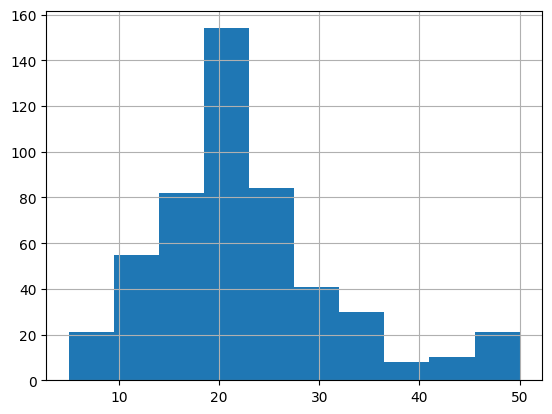

In [30]:
boston_data.MEDV.hist()

In [31]:
from scipy.stats.mstats import normaltest

In [32]:
normaltest(boston_data.MEDV.values)

NormaltestResult(statistic=np.float64(90.9746873700967), pvalue=np.float64(1.7583188871696098e-20))

In [33]:
def plot_exponential_data():
    x = np.linspace(0, 5, 100)
    y = np.exp(x)
    
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label="Exponential Function")
    plt.xlabel("x")
    plt.ylabel("exp(x)")
    plt.title("Exponential Plot")
    plt.legend()
    plt.grid(True)
    plt.show()

# data=plot_exponential_data()
# data


In [34]:
# plt.hist(np.log(data))

In [38]:
log_medv = np.log(boston_data.MEDV)
log_medv

0      3.178054
1      3.072693
2      3.546740
3      3.508556
4      3.589059
         ...   
501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: MEDV, Length: 506, dtype: float64

<Axes: >

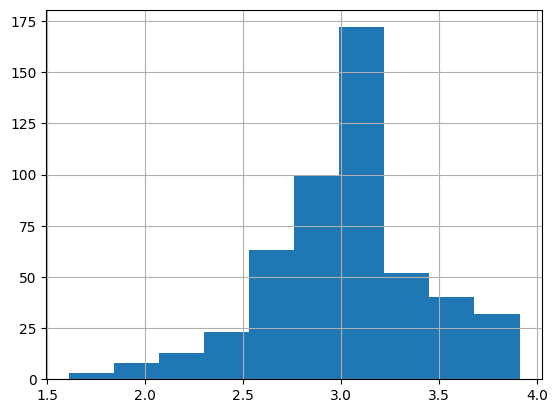

In [36]:
log_medv.hist()

In [37]:
normaltest(log_medv.values)

NormaltestResult(statistic=np.float64(17.21801696640698), pvalue=np.float64(0.00018245472768345196))

In [42]:
def plot_square_normal_data():
    x = np.linspace(-3, 3, 100)
    y = x ** 2
    
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label="Square Function", color='r')
    plt.xlabel("x")
    plt.ylabel("x^2")
    plt.title("Square Function Plot")
    plt.legend()
    plt.grid(True)
    plt.show()

# data=plot_square_normal_data()
# data

In [43]:
# plt.hist(np.sqrt(data))

(array([  9.,  18.,  40.,  67., 131., 121.,  48.,  36.,  10.,  26.]),
 array([2.23606798, 2.71956796, 3.20306794, 3.68656793, 4.17006791,
        4.65356789, 5.13706788, 5.62056786, 6.10406784, 6.58756783,
        7.07106781]),
 <BarContainer object of 10 artists>)

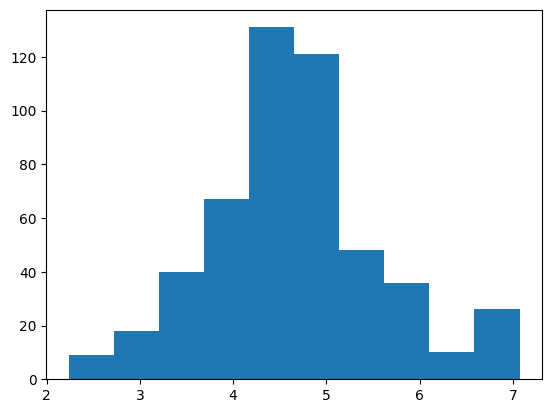

In [44]:
sqrt_medv=np.sqrt(boston_data.MEDV)
plt.hist(sqrt_medv)

In [45]:
normaltest(sqrt_medv)

NormaltestResult(statistic=np.float64(20.487090826863067), pvalue=np.float64(3.558645701429252e-05))

Box cox

In [46]:
from scipy.stats import boxcox


In [47]:
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lambda_value = bc_result[1]

In [49]:
bc_result[0]

array([4.57293637, 4.36558166, 5.33694273, 5.25495446, 5.42860689,
       4.93592662, 4.48001683, 4.81796329, 3.85654088, 4.10949441,
       3.68340136, 4.10949441, 4.37457313, 4.25505556, 4.03844836,
       4.20749535, 4.49716756, 3.96522836, 4.23614225, 4.03844836,
       3.50909851, 4.1785081 , 3.70724917, 3.62267296, 3.75421674,
       3.54759408, 3.86763825, 3.65930314, 4.05896259, 4.31093716,
       3.38947462, 3.62267296, 3.45672253, 3.44343457, 3.49611884,
       4.10949441, 4.21708168, 4.31093716, 4.63034334, 5.08317361,
       5.34934182, 4.77998165, 4.67854354, 4.63034334, 4.32928635,
       4.14917118, 4.21708168, 3.86763825, 3.61033098, 4.1589896 ,
       4.1882089 , 4.26445779, 4.65455672, 4.52267685, 4.10949441,
       5.3800978 , 4.63034334, 5.13720139, 4.51420237, 4.1785081 ,
       4.08940884, 3.80025017, 4.41904971, 4.65455672, 5.2292247 ,
       4.53112301, 4.1589896 , 4.40135419, 3.95458193, 4.30171117,
       4.58947077, 4.37457313, 4.47139742, 4.52267685, 4.58121

In [48]:
lambda_value

np.float64(0.21662090066621686)

<Axes: >

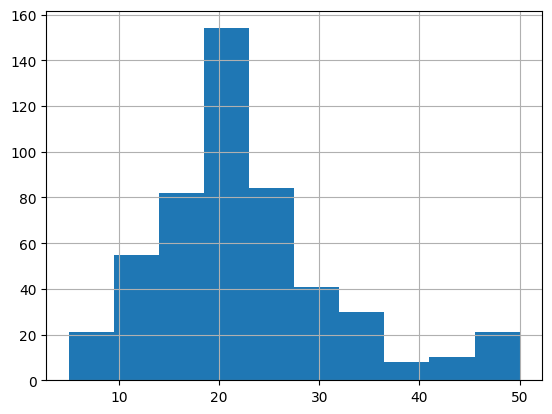

In [50]:
boston_data['MEDV'].hist()

(array([  4.,  15.,  17.,  49.,  68., 151.,  99.,  50.,  23.,  30.]),
 array([1.92564954, 2.3487372 , 2.77182485, 3.1949125 , 3.61800015,
        4.0410878 , 4.46417546, 4.88726311, 5.31035076, 5.73343841,
        6.15652606]),
 <BarContainer object of 10 artists>)

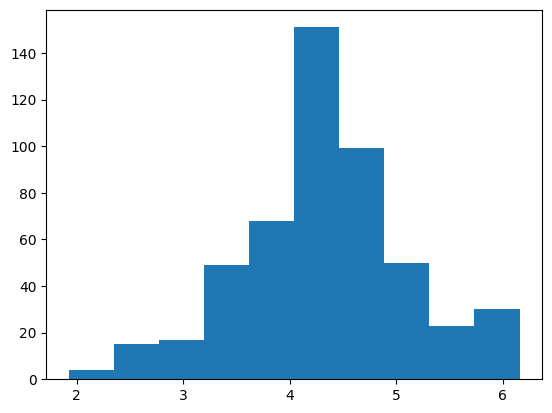

In [51]:
plt.hist(boxcox_medv)

In [52]:
normaltest(boxcox_medv)

NormaltestResult(statistic=np.float64(4.513528777459233), pvalue=np.float64(0.10468866918093514))

Testing regrassion

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler,PolynomialFeatures)

In [54]:
lr=LinearRegression()

In [55]:
boston_data=pd.read_csv("HousingData.csv")

In [56]:
y_col='MEDV'
X=boston_data.drop(y_col,axis=1)
y=boston_data[y_col]

In [57]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [58]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [60]:
boston_data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
pf=PolynomialFeatures(degree=2,include_bias=False)
X_pf=pf.fit_transform(X)

In [ ]:
X_pf


In [61]:
X.shape

(506, 13)

In [ ]:
X_pf.shape

train test splite

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_pf,y,test_size=0.3,random_state=72018)

In [ ]:
X_train.shape

In [63]:
s=StandardScaler()

In [ ]:
X_train_s=s.fit_transform(X_train)

In [ ]:
X_train_s.shape

In [ ]:
bc_result2=boxcox(y_train)
y_train_bc=bc_result2[0]
lambda_value2=bc_result2[1]

In [ ]:
y_train_bc.shape

In [ ]:
lr.fit(X_train_s,y_train_bc)
X_test_s=s.transform(X_test)
y_pred_bc=lr.predict(X_test_s)